#Esperimento Corda

## Importo Le Librerie

In [53]:
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files

## Fit Lineare 1

### Raccolgo I Dati

In [76]:
lunghezza_filo_totale = 1.35 #m
lunghezza_filo_oscillante = 0.88 #m
lunghezza_filo_oscillante_err = 0.001 #m
massa_tarata = 0.100 # kg
frequenza_1 = 12.10 #hz forse 13.10
frequenza_1_err = 0.10 #hz

n = 9

modi = [i for i in range(n - 1)]
frequenze_fondamentali = [frequenza_1 * i for i in range(1, n)]
errori_frequenze_fondamentali = [frequenza_1_err] * (n - 1)
k = [i * np.pi / lunghezza_filo_oscillante for i in range(1, 9)]
k_err = [(lunghezza_filo_oscillante_err / lunghezza_filo_oscillante) * k[i] for i in range(len(k))]

w = [2 * np.pi * frequenze_fondamentali[i] for i in range(0, n - 1)]
w_err = [2 * np.pi * 0.10] * (n - 1)

print(k)
print(k_err)
print(w)
print(w_err)


[3.5699916518065833, 7.139983303613167, 10.70997495541975, 14.279966607226333, 17.849958259032917, 21.4199499108395, 24.98994156264608, 28.559933214452666]
[0.004056808695234754, 0.008113617390469507, 0.01217042608570426, 0.016227234780939015, 0.02028404347617377, 0.02434085217140852, 0.028397660866643273, 0.03245446956187803]
[76.026542216873, 152.053084433746, 228.07962665061896, 304.106168867492, 380.132711084365, 456.1592533012379, 532.1857955181109, 608.212337734984]
[0.6283185307179586, 0.6283185307179586, 0.6283185307179586, 0.6283185307179586, 0.6283185307179586, 0.6283185307179586, 0.6283185307179586, 0.6283185307179586]


### Plot Dei Dati

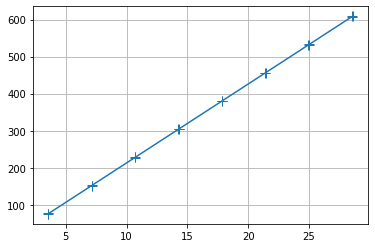

In [82]:
x = np.array(k)
y = np.array(w)
x_err = np.array(k_err)
y_err = np.array(w_err)

plt.figure()
plt.grid()
_ = plt.errorbar(x, y, xerr=x_err, yerr=y_err, capsize=5)

### Fit Dei Dati

In [78]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

In [88]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(A, B, print_output=True):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 

  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, x, y)

                                                                                                
  #plotting fit result
  plt.errorbar(x, y, xerr=x_err, yerr = y_err, capsize=5)
  plt.scatter(x,y, s=25, c = "c", label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color= "m" ,label="Fit",linewidth=1)
  plt.xlabel("")
  plt.ylabel("")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  
  
  if print_output:
    label = ["A", "B"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%10s = %9.6f +- %7.6f" % (l ,v, e))
    print("\n")
 

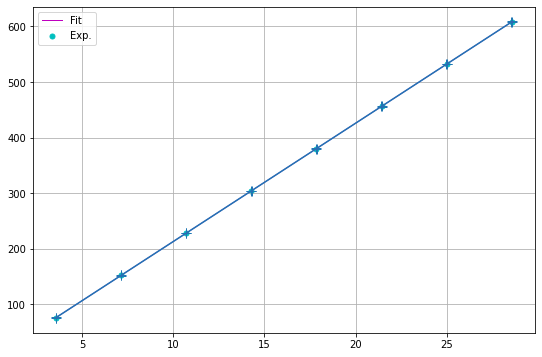

         A = 21.296000 +- 0.000000
         B = -0.000002 +- 0.000000




In [89]:
fitplot(21, 0)

## Fit Lineare 2

### Raccolgo I Dati

In [133]:
#massa_tara = 49.7
#masse = [49.3, 99.2, 199.4, 199.8]
lunghezza_filo_totale = 1.35 #m
lunghezza_filo_oscillante = 0.88 #m
lunghezza_filo_oscillante_err = 0.001 #m

# masse g
massa_1 = 49.7 + 99.2 # tara + 100
massa_2 = massa_1 + 49.3 # tara + 100 + piccolino 
massa_3 = 49.7 + 199.4 # tara + 200s
massa_4 = massa_3 + 49.7 # tara + 200s + piccolino
massa_5 = massa_3 + 99.2 # tara + 200s + 100
massa_6 = massa_5 + 49.3 # tara + 200s + 100 + piccolino
massa_7 = massa_3 + 199.8 # tara + 200s + 200
massa_8 = massa_7 + 49.3 # tara + 200s + 200 + piccolino
massa_9 = massa_7 + 99.2 # tara + 200s + 200 + 100
massa_10 = massa_9 + 49.3 # tara + 200s + 200 + 100 + piccolino

# frequenze hz
frequenza_1 = 12.1
frequenza_2 = 14.12
frequenza_3 = 16.3
frequenza_4 = 17.28
frequenza_5 = 18.57
frequenza_6 = 19.86
frequenza_7 = 21.12
frequenza_8 = 22.23
frequenza_9 = 23.85
frequenza_10 = 24.74

frequenze = [frequenza_1, frequenza_2, frequenza_3, frequenza_4, frequenza_5, frequenza_6, frequenza_7, frequenza_8, frequenza_9, frequenza_10]
masse = [massa_1, massa_2, massa_3, massa_4, massa_5, massa_6, massa_7, massa_8, massa_9, massa_10]

frequenze_err = [0.10] * len(frequenze)
masse_err = [0.0001] * len(masse)

print(frequenze, len(masse), len(frequenze_err), len(masse_err))
print(masse)

[12.1, 14.12, 16.3, 17.28, 18.57, 19.86, 21.12, 22.23, 23.85, 24.74] 10 10 10
[148.9, 198.2, 249.10000000000002, 298.8, 348.3, 397.6, 448.90000000000003, 498.20000000000005, 548.1, 597.4]


### Plot Dei Dati

[76.026542216873, 88.71857653737575, 102.41592050702727, 108.57344210806326, 116.67875115432491, 124.78406020058658, 132.70087368763288, 139.6752093786022, 149.85396957623314, 155.44600449962294]
[3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833, 3.5699916518065833]
[453.519616, 617.58214144, 823.0013440000001, 924.9384038400001, 1068.19156224, 1221.7541529599996, 1381.6981094400005, 1530.74997504, 1761.9845759999998, 1895.9405977599995]
[1.4599645, 1.9433509999999998, 2.4424255, 2.929734, 3.4150815000000003, 3.8984680000000003, 4.4014645, 4.884851, 5.3741205, 5.857507]


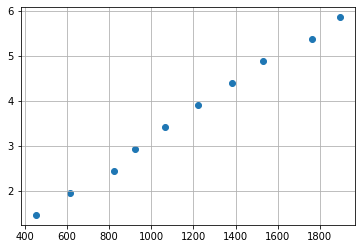

In [124]:
tensioni = [masse[index] * 9.805 * (10**(-3)) for index in range(len(masse))]
w = [2 * np.pi * frequenze[i] for i in range(len(frequenze))]
print(w)
k = [(1) * np.pi / lunghezza_filo_oscillante for i in range(len(frequenze))]
print(k)
prop = [((w[index] / k[index])) ** 2 for index in range(len(w))]

print(prop)
print(tensioni)

x = np.array(prop)
y = np.array(tensioni)
#x_err = np.array(k_err)
#y_err = np.array(w_err)

plt.figure()
plt.grid()
_ = plt.scatter(x, y)

### Fit Dei Dati

In [125]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

In [126]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(A, B, print_output=True):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 

  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, x, y)

                                                                                                
  #plotting fit result
  # plt.errorbar(x, y, xerr=x_err, yerr = y_err, capsize=5)
  plt.scatter(x,y, s=25, c = "c", label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color= "m" ,label="Fit",linewidth=1)
  plt.xlabel("")
  plt.ylabel("")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  
  
  if print_output:
    label = ["A", "B"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%10s = %9.6f +- %7.6f" % (l ,v, e))
    print("\n")
 

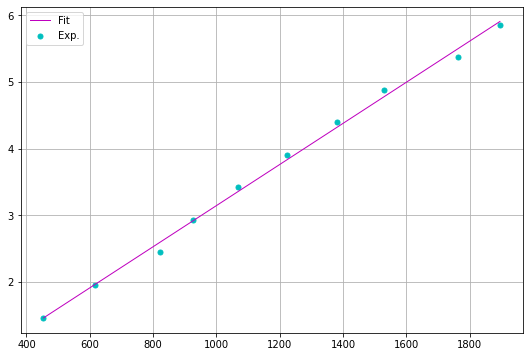

         A =  0.003087 +- 0.000064
         B =  0.055581 +- 0.080255




In [127]:
fitplot(1, 1)

In [132]:
0.0046 *1.87

0.008602

## Fit Gnegne

### Importo I Dati

In [135]:
massa = 0.6509
lunghezza_filo = 92.5
diametro = 1.98 # +- 0.02 mm
frequenze = [9.8, 25, 47.5, 79, 120.6, 165, 221.3, 342]
k = [(i + 1) * np.pi / lunghezza_filo for i in range(len(frequenze))]

### Faccio Il Plot Dei Dati

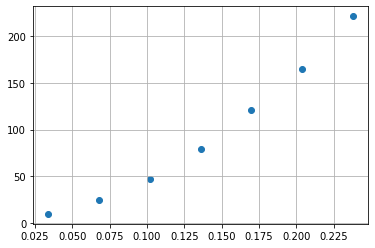

In [137]:
x = k[:-1]
y = frequenze[:-1]

plt.figure()
plt.grid()
_ = plt.scatter(x, y)

### Faccio Il Fit Dei Dati

In [ ]:
def funza()